# Project: Investigate a Dataset - [Medical-Appoinment-No-Show]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information on over 100,000 medical appointments in Brazil. Each row represents a scheduled appointment and includes details about the patient, such as demographic information, medical conditions, and whether they attended their appointment or not. Understanding the factors that influence patient no-shows is crucial for improving healthcare efficiency and resource management.

#### Dataset Columns and Their Significance

| **Column Name**        | **Description** |
|------------------------|---------------|
| **PatientID** | Unique identifier for each patient. |
| **AppointmentID** | Unique identifier for each appointment. |
| **Gender** | The patient's gender (`F` = Female, `M` = Male). |
| **ScheduledDay** | The date and time when the appointment was scheduled. |
| **AppointmentDay** | The actual date of the appointment. |
| **Age** | The patient's age.  |
| **Neighbourhood** | The neighborhood where the patient resides. |
| **Scholarship** | Indicates whether the patient is enrolled in the Brazilian social welfare program *Bolsa Família* (`1 = Yes, 0 = No`). |
| **Hypertension** | Indicates whether the patient has been diagnosed with hypertension (`1 = Yes, 0 = No`). |
| **Diabetes** | Indicates whether the patient has diabetes (`1 = Yes, 0 = No`). |
| **Alcoholism** | Indicates whether the patient has a history of alcoholism (`1 = Yes, 0 = No`).  |
| **Handcap** | Represents the presence and severity of a disability (`1, 2, 3, 4` denote different levels of impairment). |
| **SMS_received** | Indicates whether the patient received an SMS reminder (`1 = Yes, 0 = No`). |
| **No-show** | **Target variable.** Indicates whether the patient missed the appointment (`"No"` = Attended, `"Yes"` = Did not attend).  |

### Questions for Analysis 

1. Does sending SMS really improve attendance?
2. Do patients with certain medical conditions have a lower likelihood of missing appointments?
3. Does age or Neighborhood of residence affect attendance?



In [111]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [112]:
#Load Dataset
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [113]:
#returns info about the dataframe including the number of non-null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


With df.info(), we can see the number of non-null values in each column and the data type of each one.

In [114]:
#returns the shape of the DataFrame
df.shape

(110527, 14)

In [115]:
#returns number of unique values for each column 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

By looking at the unique values, we can see that there are 62,299 unique patientId values and 110,527 unique appointmentID values, which is the total number of rows I have. Here, we can observe that the same patient has had more than one appointment scheduled.

In [116]:
#returns summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**1.Age:**
The age range goes from -1 (which could indicate a missing or incorrect value) up to 115 years.The mean age is 37 years, with a standard deviation of 23 years, suggesting a wide diversity in patients’ ages. There are lower values (25%) that likely correspond to younger patients.

**2.Scholarship:**
The mean is low (0.098), indicating that only a small percentage of patients are part of the Brazilian social assistance program (Bolsa Família).The column contains binary values (0 or 1), and 75% of patients are not part of this program.

**3.Hypertension:**
Approximately 20% of patients have hypertension, as the mean is 0.197.

**4.Diabetes:**
Only 7.18% of patients have diabetes, with a mean of 0.072.

**5.Alcoholism:**
Only 3.04% of patients have a history of alcoholism, suggesting that this condition is less prevalent in the dataset.

**6.Handcap (Disability):**
The values in this column are integers between 0 and 4, which could indicate levels of disability.

**7.SMS_received:**
The mean is 0.32, indicating that about 32% of patients received an SMS reminder.


### Data Cleaning

In [117]:
# Function to correct the data types of date columns
def correct_date_columns(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df

# Call the function to correct the data types for 'ScheduledDay' and 'AppointmentDay' columns
df = correct_date_columns(df, ['ScheduledDay', 'AppointmentDay'])

# Display the data types to verify
print(df.dtypes)

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object


We will change the data type of ScheduledDay and AppointmentDay, as they are dates and should be of the datetime type.

In [118]:
#We check if we have a duplicated rows
sum(df.duplicated())

0

We see that we don’t have any duplicate rows.

In [119]:
#We check if we have patientID duplicated 
sum(df.PatientId.duplicated())

48228

But we do have the same PatientID repeated, as the same patient could have multiple appointments.

In [120]:
#Count the number of appointments by 'PatientId'
appointment_counts = df['PatientId'].value_counts()

#Filter the 'PatiendId' with more than one scheduled appointment
multiple_appointments = appointment_counts[appointment_counts > 1]
multiple_appointments

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
6.219855e+14     2
9.577469e+13     2
9.768428e+13     2
1.371940e+14     2
1.321956e+12     2
Name: PatientId, Length: 24379, dtype: int64

We can see which PatientId has more than one scheduled appointment.

In [121]:
#Filter the rows where 'Age' has a negative value
negative_age = df[df['Age'] < 0]
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


We only have one row that contains this value. We can check if this PatientId is repeated to see if we can replace the age with the correct data or remove the row.

In [122]:
#Filter the rows where 'Age' is -1
incorrect_age = df[df['Age'] == -1]

#Get the 'PatientId' of those rows
patient_id = incorrect_age['PatientId'].iloc[0] 

#Check if this 'PatientId' is repeated and get the associated ages
repeated_patient = df[df['PatientId'] == patient_id]

#View the ages associated with that PatientId
print(repeated_patient[['PatientId', 'Age']])

          PatientId  Age
99832  4.659432e+14   -1


Since we cannot determine the age of this patient and it is only one data point out of 110527, we will remove this row.

In [123]:
#remove row with 'Age'== -1
df = df[df['PatientId'] != patient_id]

In [124]:
# Rename the columns
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
df.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighborhood    110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

Now, with df.info(), we can see that the number of rows is 110526 and that the data for ScheduledDay and AppointmentDay are of datetime type.

<a id='eda'></a>
## Exploratory Data Analysis

### Does sending SMS really improve attendance?

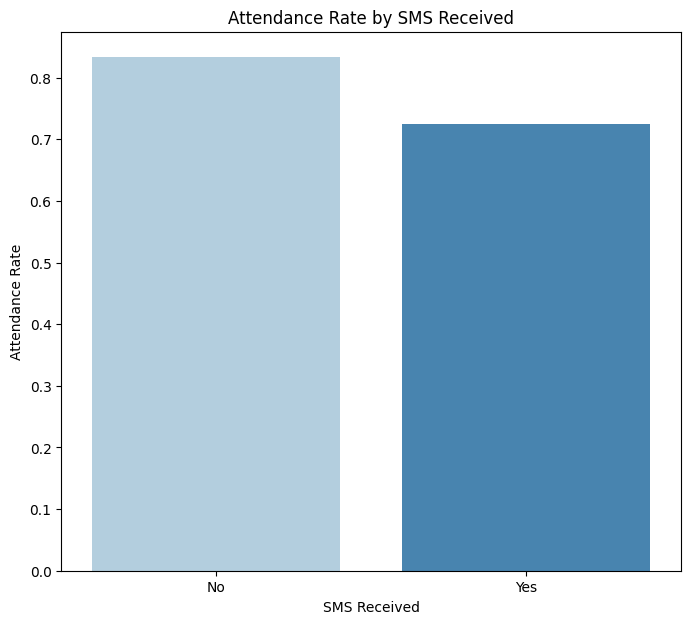

In [126]:
#Grouping by 'SMS-received' and 'No-show'
attendance_sms = df.groupby(['SMS_received', 'No-show']).size().unstack().fillna(0)

#Calculating the attendance rate
attendance_sms['attendance_rate'] = attendance_sms['No'] / (attendance_sms['No'] + attendance_sms['Yes'])

# Visualizing the results
plt.figure(figsize=(8,7))
sns.barplot(x=attendance_sms.index, y=attendance_sms['attendance_rate'], palette='Blues')
plt.title('Attendance Rate by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Attendance Rate')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

Despite the expectation that SMS reminders would improve attendance, the group that did not receive SMS had a slightly higher attendance rate (0.8) compared to the group that received SMS (0.75). This suggests that SMS reminders might not be as effective as anticipated, or other factors could be influencing attendance. Further analysis is needed, including examining patient demographics and additional variables, to determine whether the difference is statistically significant and to uncover the underlying causes.

### Do patients with certain medical conditions have a lower likelihood of missing appointments?

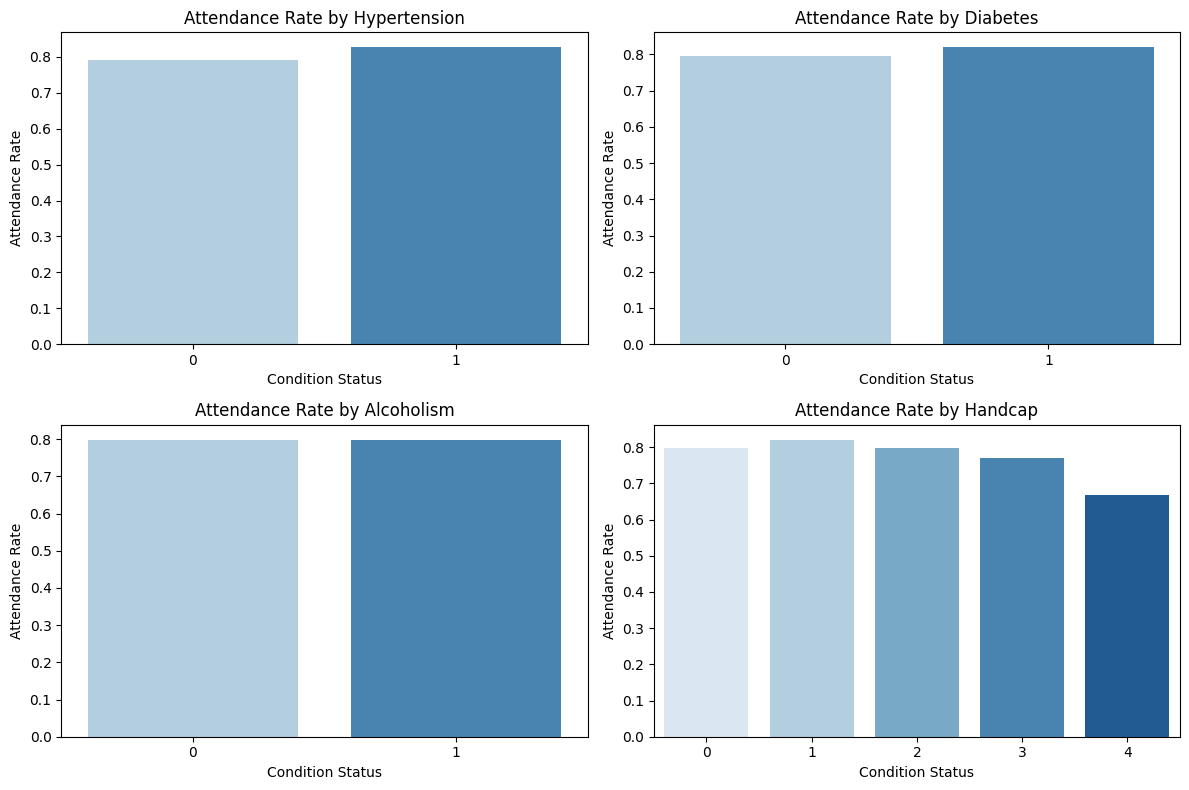

In [127]:
#Group by medical conditions and the 'No-show' column
conditions = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']
attendance_by_condition = {}

for condition in conditions:
    # Count attendance cases by condition
    attendance_by_condition[condition] = df.groupby([condition, 'No-show']).size().unstack().fillna(0)
    
    # Ensure that 'No' and 'Yes' columns exist before calculating the attendance rate
    if 'No' in attendance_by_condition[condition] and 'Yes' in attendance_by_condition[condition]:
        attendance_by_condition[condition]['attendance_rate'] = attendance_by_condition[condition]['No'] / (attendance_by_condition[condition]['Yes'] + attendance_by_condition[condition]['No'])
    else:
        attendance_by_condition[condition]['attendance_rate'] = None

#Create a plot for each medical condition
plt.figure(figsize=(12, 8))
for i, condition in enumerate(conditions):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=attendance_by_condition[condition].index, y=attendance_by_condition[condition]['attendance_rate'], palette='Blues')
    plt.title(f'Attendance Rate by {condition}')
    plt.xlabel('Condition Status')
    plt.ylabel('Attendance Rate')

plt.tight_layout()
plt.show()

Overall, medical conditions such as hypertension, diabetes, and alcoholism do not show a significant impact on appointment attendance rates. However, patients with higher levels of handicap face greater challenges in attending their appointments. 

### Does age or Neighborhood of residence affect attendance?

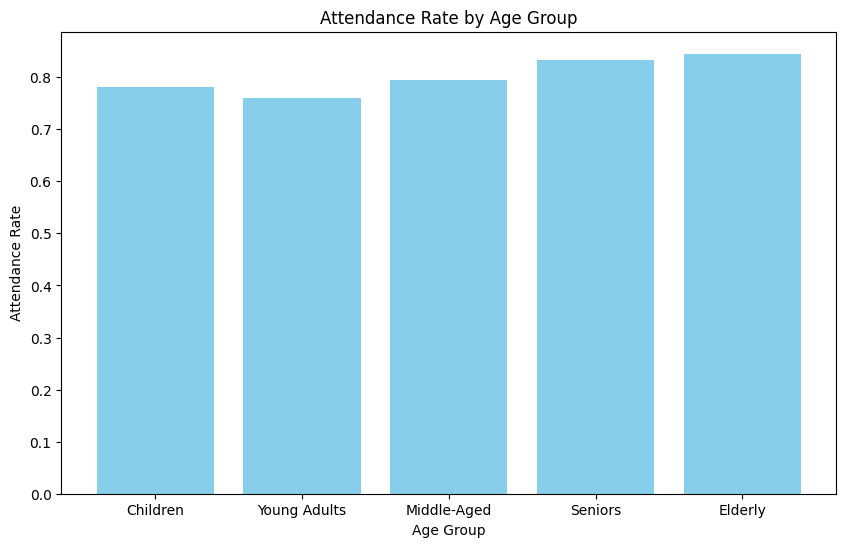

In [128]:
#Create Age bins
bins = [0, 18, 35, 50, 65, 100]
labels = ['Children', 'Young Adults', 'Middle-Aged', 'Seniors', 'Elderly']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Group by Age Group and No-show
attendance_by_age = df.groupby(['Age Group', 'No-show']).size().unstack().fillna(0)

#Calculate attendance rates
attendance_by_age['attendance_rate'] = attendance_by_age['No'] / (attendance_by_age['No'] + attendance_by_age['Yes'])

#Plot attendance rates by age group
plt.figure(figsize=(10, 6))
plt.bar(attendance_by_age.index, attendance_by_age['attendance_rate'], color='skyblue')
plt.title('Attendance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attendance Rate')
plt.show()

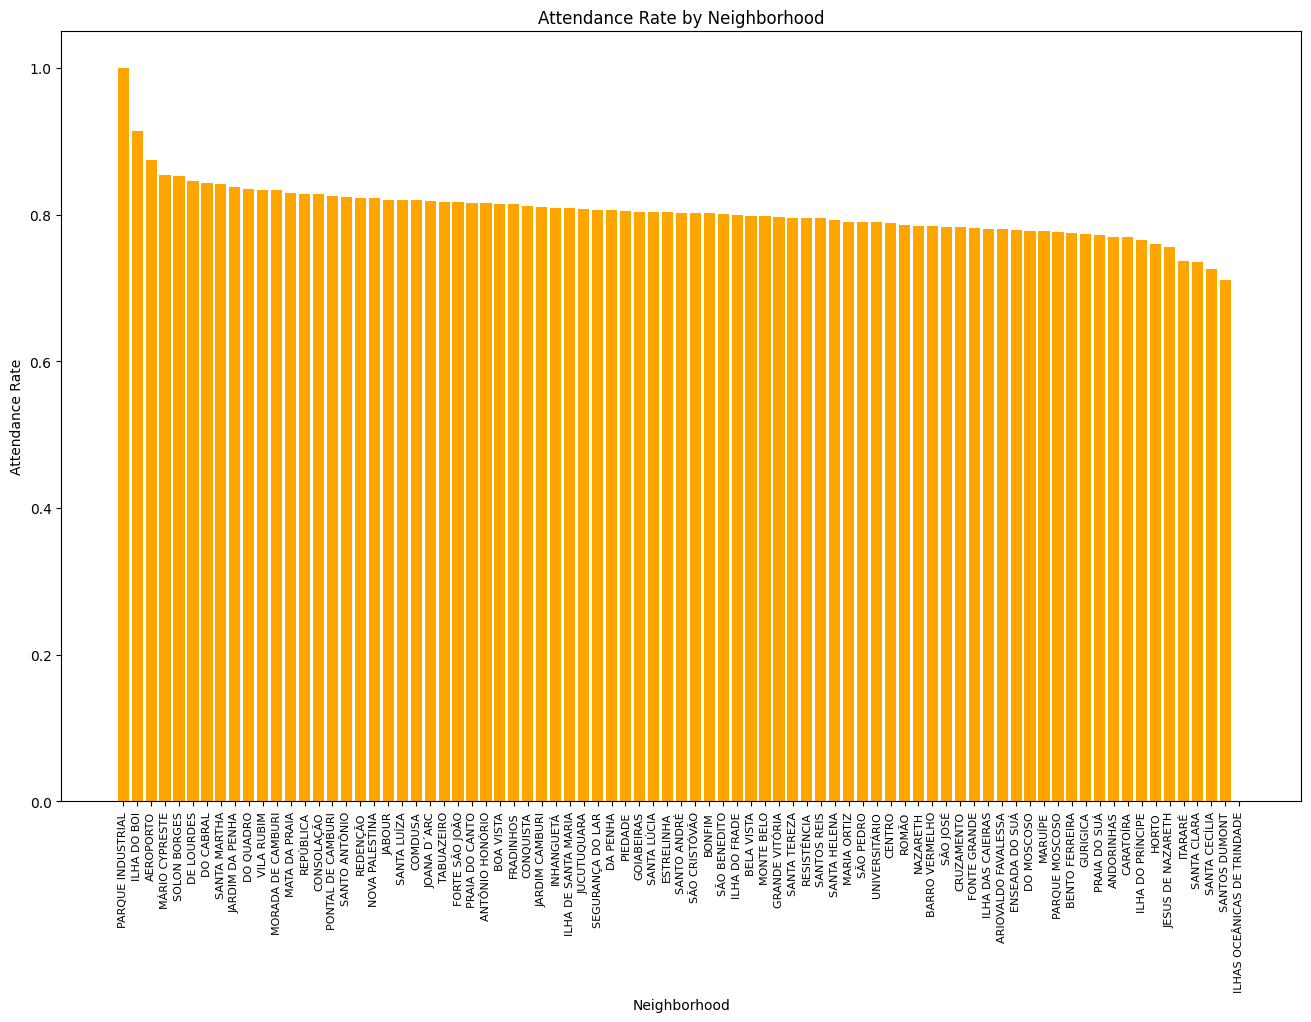

In [129]:
# Group by Neighborhood and No-show
attendance_by_neighborhood = df.groupby(['Neighborhood', 'No-show']).size().unstack().fillna(0)

# Calculate attendance rates
attendance_by_neighborhood['attendance_rate'] = attendance_by_neighborhood['No'] / (
    attendance_by_neighborhood['No'] + attendance_by_neighborhood['Yes'])

# Sort by attendance rate
attendance_by_neighborhood = attendance_by_neighborhood.sort_values('attendance_rate', ascending=False)

# Plot attendance rates by neighborhood
plt.figure(figsize=(16, 10))  # Increased figure size for better readability
plt.bar(attendance_by_neighborhood.index, attendance_by_neighborhood['attendance_rate'], color='orange')
plt.title('Attendance Rate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels and reduce font size
plt.show()

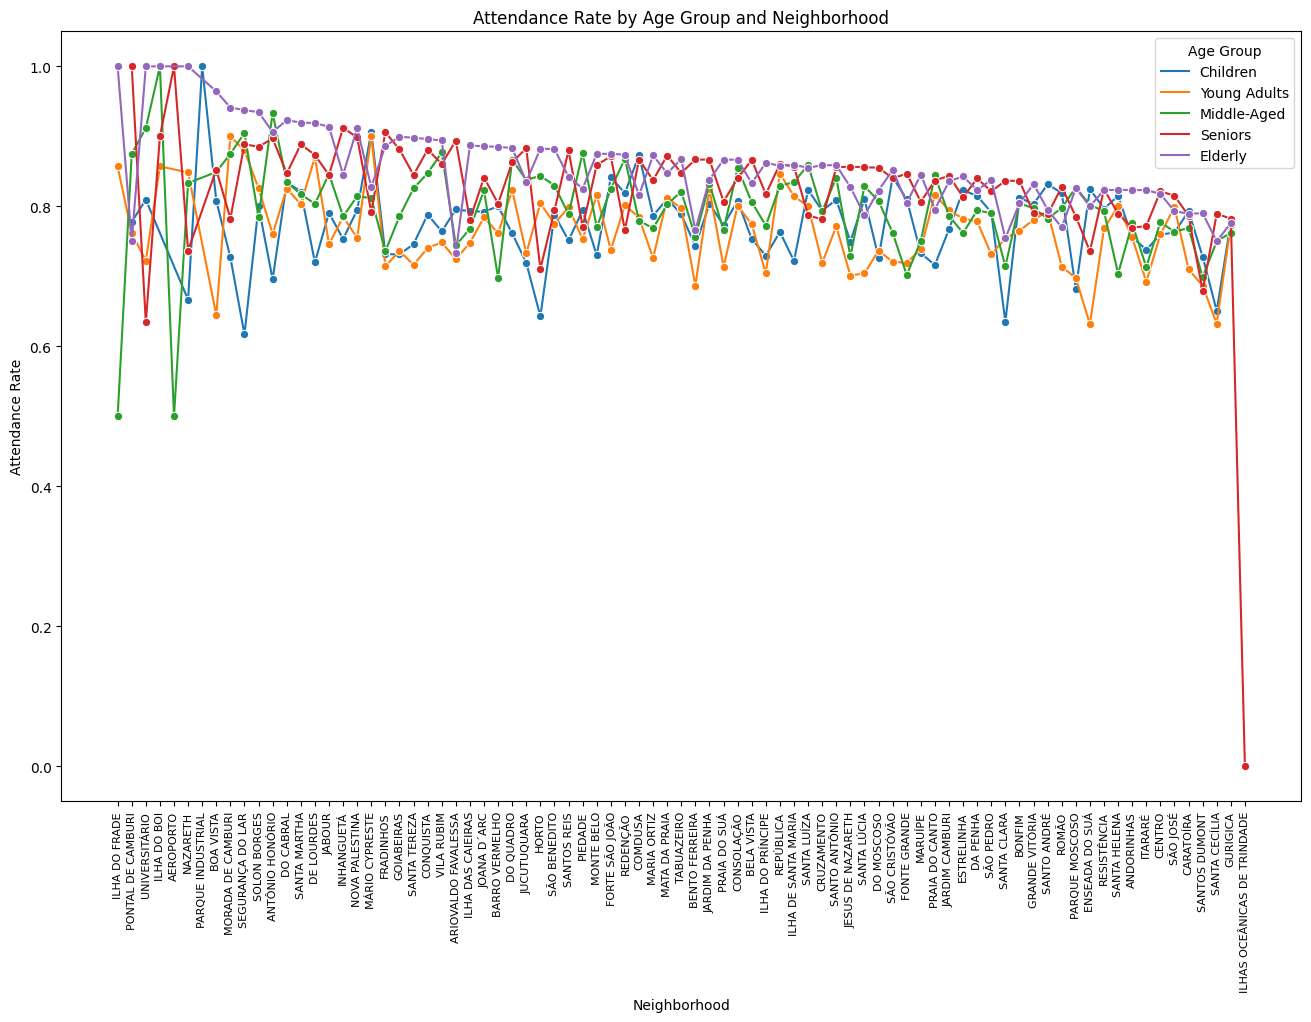

In [130]:
#Group by Age Group and Neighborhood, and No-show
attendance_by_age_neighborhood = df.groupby(['Age Group', 'Neighborhood', 'No-show']).size().unstack().fillna(0)

#Calculate attendance rates
attendance_by_age_neighborhood['attendance_rate'] = attendance_by_age_neighborhood['No'] / (
    attendance_by_age_neighborhood['No'] + attendance_by_age_neighborhood['Yes'])

#Reset index to make manipulation easier
attendance_by_age_neighborhood = attendance_by_age_neighborhood.reset_index()

#Sort by attendance rate
attendance_by_age_neighborhood = attendance_by_age_neighborhood.sort_values('attendance_rate', ascending=False)

#Create line plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Neighborhood', y='attendance_rate', hue='Age Group', data=attendance_by_age_neighborhood, marker='o')

plt.title('Attendance Rate by Age Group and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=90, fontsize=8)  # Rotar las etiquetas del eje X para mejorar la legibilidad
plt.legend(title='Age Group')
plt.show()

We can see that the purple color, which represents the elderly, shows that they attend their medical appointments the most, regardless of the neighborhood.

<a id='conclusions'></a>
## Conclusions

1. Elderly Attendance: The elderly stand out for their remarkable consistency in attending medical appointments, irrespective of their neighborhood. This group shows a higher level of commitment compared to others.
2. Neighborhood Impact: While we considered the neighborhood factor, it seems that age plays a more significant role in attendance. The elderly maintain a high attendance rate across various neighborhoods, suggesting their dedication is not swayed by location.
3. Effectiveness of SMS Reminders: Contrary to expectations, SMS reminders don’t appear to have a significant impact on improving attendance. Interestingly, those who did not receive SMS reminders had a slightly higher attendance rate than those who did, implying that other factors may be at play.
4. Medical Conditions and Attendance: Medical conditions such as hypertension, diabetes, and alcoholism don’t show a substantial effect on attendance rates. However, patients with disabilities face greater challenges in attending their appointments, highlighting the need for additional support for this group.

**Limitations**

One limitation of this analysis is that it doesn’t account for external factors like socioeconomic status, access to transportation, or other personal circumstances that may affect attendance. Additionally, the analysis was not based on statistical tests, meaning the conclusions are drawn from correlations rather than causation.

**Future Research**

Future studies could delve deeper into understanding why the elderly have such high attendance rates, as well as explore why SMS reminders are less effective than anticipated. Investigating factors that could enhance attendance for patients with disabilities would be valuable. Furthermore, further research into the relationship between medical conditions and attendance, incorporating additional factors, could offer more comprehensive insights.ditional factors, could provide more comprehensive insights.

In [131]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 939661 bytes to Investigate_a_Dataset.html
